In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Models.grid_search_utils import GridSearch as Gs
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
    

In [2]:
LGBMRanker = Gs.load_model(name="../Models/BlackBox/lmart/saved_models/LGBMRanker")
FIGSReg = Gs.load_model(name="../Models/GlassBox/figs/saved_models/FIGSReg")
EBMReg = Gs.load_model(name="../Models/GlassBox/ebm/saved_models/EBMReg")
test_set = pd.read_csv("../outputs/scores/0_dataset_ts.csv")

In [3]:
job = test_set[test_set["qId"]==84].copy()

output_lgmb = LGBMRanker.predict(job.iloc[:,5:].to_numpy())
output_ebm = EBMReg.predict(job.iloc[:,5:].to_numpy())
output_figs = FIGSReg.predict(job.iloc[:,5:].to_numpy())

rank_w_score = pd.DataFrame(job["w_score"].values, index=job.index, columns=["pred"])
rank_w_score = rank_w_score.sort_values(by="pred", ascending=False).head(10)
rank_w_score["rank"] = rank_w_score["pred"].rank(method="first")
rank_w_score["ax"] = 0


rank_lgmb = pd.DataFrame(output_lgmb, index=job.index, columns=["pred"])
rank_lgmb = rank_lgmb.sort_values(by="pred",ascending=False).head(10)
rank_lgmb["rank"] = rank_lgmb["pred"].rank(method="first")
rank_lgmb["ax"] = 1

rank_ebm = pd.DataFrame(output_ebm, index=job.index, columns=["pred"])
rank_ebm = rank_ebm.sort_values(by="pred",ascending=False).head(10)
rank_ebm["rank"] = rank_ebm["pred"].rank(method="first")
rank_ebm["ax"] = 2

rank_figs = pd.DataFrame(output_figs, index=job.index, columns=["pred"])
rank_figs = rank_figs.sort_values(by="pred",ascending=False).head(10)
rank_figs["rank"] = rank_figs["pred"].rank(method="first")
rank_figs["ax"] = 3

In [4]:
rank_ebm

,pred,rank,ax
3917,69.532266,10.0,2
1942,68.806140,9.0,2
769,68.157740,8.0,2
2460,66.693048,7.0,2
2634,66.227494,5.0,2
1822,66.227494,6.0,2
741,65.978366,4.0,2
5057,65.830429,1.0,2
945,65.830429,2.0,2
1158,65.830429,3.0,2


In [5]:
job

,qId,kId,score,w_score,binned_score,fitness_edu_basic,fitness_edu_bonus,fitness_city,fitness_age,fitness_exp_basic,fitness_exp_bonus,fitness_lang_basic,fitness_lang_bonus,fitness_comp_basic,fitness_comp_bonus,fitness_know_basic,fitness_knowl_bonus,fit_expertize,fit_edu_judgment
236,84,6563,7.868277,59.864661,3,1.0,1.0,1.0,1.0,1.0,0.0,1.0000,0.0,0.428766,0.0,0.771429,0.138825,2.668367e-03,0.526589
271,84,6552,3.701406,44.291164,2,1.0,0.0,0.0,1.0,0.0,0.0,0.3500,0.0,0.392112,0.0,0.750000,0.201214,8.080802e-03,0.000000
539,84,6547,5.392579,65.343736,3,1.0,1.0,0.0,1.0,0.0,0.0,0.5000,0.0,0.680991,0.0,0.534170,0.147621,3.206659e-03,0.526589
741,84,6585,7.295528,73.574356,4,1.0,1.0,0.0,1.0,1.0,0.0,0.8500,0.0,0.690958,0.0,1.000000,0.217761,1.022079e-02,0.526589
769,84,6548,7.420791,67.587651,4,1.0,1.0,0.0,1.0,1.0,0.0,1.0000,0.0,0.733650,0.0,1.000000,0.156717,3.834272e-03,0.526589
905,84,6522,6.489378,58.630635,3,1.0,1.0,0.0,1.0,1.0,0.0,0.4125,0.0,0.676112,0.0,0.750000,0.122350,1.828157e-03,0.526589
945,84,6544,7.220356,64.767654,3,1.0,1.0,0.0,1.0,1.0,0.0,0.8500,0.0,0.683215,0.0,1.000000,0.156717,3.834272e-03,0.526589
1101,84,6594,1.001078,19.261134,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.000000,0.0,0.001078,0.000000,0.000000e+00,0.000000
1158,84,6578,7.218759,63.675454,3,1.0,1.0,0.0,1.0,1.0,0.0,0.8500,0.0,0.690821,0.0,1.000000,0.148110,3.238517e-03,0.526589
1343,84,6595,5.058956,43.860391,2,1.0,1.0,0.0,1.0,1.0,0.0,0.5000,0.0,0.030203,0.0,0.000000,0.002165,1.014084e-08,0.526589


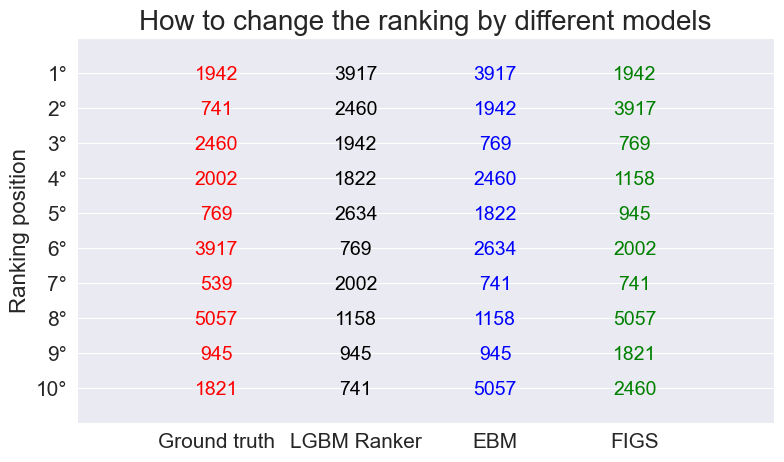

In [6]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(9, 5))

color = ["Red","Black","Blue","Green"]
for i, dt in enumerate([rank_w_score,rank_lgmb,rank_ebm,rank_figs]):
    for kId in dt.index:
        y = dt.loc[kId, "rank"] - 0.2
        x = dt.loc[kId, "ax"]
        axs.text(x, y, kId, horizontalalignment='center', size=14, color=color[i])
        
axs.set_xticks([-1, 0, 1, 2, 3, 4],["","Ground truth","LGBM Ranker","EBM","FIGS",""])
axs.set_yticks([*range(1,12)],[str(i)+"°" for i in range(10,0,-1)]+[""])
axs.tick_params(axis='both', labelsize=15)
axs.set_xlabel("")
axs.set_ylabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking by different models", fontsize=20)
axs.grid(axis='x')
plt.show()